In [1]:
%load_ext autoreload
%autoreload 2

# Clase Tutorial 2: Introducción y Regresión Lineal

* El objetivo principal de esta clase es ponernos al día con las herramientas básicas de manejo de arrays y de ploteo de gráficos que vamos a utilizar para estudiar el desarrollo de modelos de aprendizaje automático. 

* Dentro de las muchas herramientas, sobresalen las bibliotecas:
    * [Numpy](https://numpy.org/): para representación y operación algebraica de datos numéricos y
    * [Matplotlib](https://matplotlib.org/): para confección de gráficos.
    
* Para dar un primer ejemplo de su utilización, vamos a plantear un problema de regresión simple, el cual vamos a revisitar en clases teóricas y prácticas subsiguientes. 

## ⚙️ Herramientas de Software

#### 1. Python como lenguaje de programación
Python es el lenguaje de programación que utilizaremos en este curso. Es ampliamente usado en ciencia de datos, machine learning, y muchas otras áreas debido a su simplicidad y versatilidad. 

#### 2. IDEs como herramienta principal de desarrollo de código
Para escribir y desarrollar nuestro código, utilizaremos diferentes entornos de desarrollo integrados (IDEs). Algunas de las opciones más comunes son:

- **Spyder**: Este IDE es nativo de Anaconda y está diseñado específicamente para científicos de datos. Ofrece herramientas potentes y un entorno amigable para escribir y probar nuestro código.
- **VSCode**: Desarrollado por Microsoft, es uno de los editores de código más populares debido a su flexibilidad y la gran cantidad de extensiones disponibles. Es altamente personalizable y adecuado para una amplia variedad de lenguajes de programación, incluido Python.
- **vim, emacs, y otros editores de texto**: Estos son editores de texto muy poderosos que algunos programadores prefieren por su eficiencia y capacidad de personalización. Sin embargo, tienen una curva de aprendizaje más pronunciada.

#### 3. Intérpretes interactivos
- **IPython**: Es un intérprete interactivo para Python que ofrece características avanzadas como el autocompletado, el resaltado de sintaxis y herramientas de depuración. Es especialmente útil para experimentar y probar pequeñas partes de código rápidamente. IPython es el núcleo del proyecto Jupyter, que permite crear y compartir documentos que contienen código en vivo, ecuaciones, visualizaciones y texto narrativo. 

#### 4. Gestores de paquetes
Para manejar las bibliotecas y dependencias que necesitaremos en nuestros proyectos, utilizaremos gestores de paquetes:

- **pip**: Es el gestor de paquetes estándar de Python. Nos permite instalar y gestionar bibliotecas que no están incluidas en la distribución estándar de Python.
- **conda**: Es un gestor de paquetes y entornos que forma parte de Anaconda. Además de manejar paquetes de Python, también puede gestionar bibliotecas de otros lenguajes, lo que lo hace muy versátil.

#### 5. Environments
La gestión de entornos es crucial para mantener nuestros proyectos organizados y evitar conflictos entre diferentes versiones de bibliotecas. Los entornos virtuales permiten crear entornos de ejecución aislados para cada proyecto, asegurando que las dependencias de un proyecto no interfieran con las de otro.

#### 🤔 Entonces... ¿Qué es [Anaconda](https://www.anaconda.com/download) y por qué recomendamos utilizarlo?

**Anaconda** es una distribución de Python y R para ciencia de datos y aprendizaje automático que simplifica la gestión de paquetes y entornos. Incluye más de 1,500 paquetes de código abierto, así como el gestor de paquetes `conda`.

Anaconda viene con Python preinstalado y muchas de las bibliotecas más comunes ya están incluidas. Esto ahorra mucho tiempo y esfuerzo en la configuración inicial.

Con `conda`, podés crear y gestionar entornos virtuales fácilmente, lo que es crucial para evitar conflictos entre proyectos.

## 📊 Rutinas para generación de datos

Cada vez que sumemos un concepto nuevo nos va a interesar ponerlo a prueba sobre algún dataset. Para estas pruebas de concepto, nos interesa poder generar datos que cumplan con dos requisitos básicos:

   - Poder controlar/conocer el <span style="color: purple;">principio</span> según el cual se generan.
   - Asegurarnos la <span style="color: purple;">repetitibilidad</span> de la generación.




Para ello, la libreria NumPy nos permite trabajar con un [objeto generador](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState) que nos brinda varias rutinas. Para poder asegurarnos la repetibilidad de la generación definimos un parámetro <span style="color: purple;">seed</span>, el cual define la inicialización de los generadores aleatorios que funcionan por detras de este objeto. Es común utilizar el número <span style="color: purple;">42</span>, pero les dejamos a ustedes averiguar el porqué ([Medium article](https://medium.com/geekculture/the-story-behind-random-seed-42-in-machine-learning-b838c4ac290a)).

In [2]:
import numpy as np

In [3]:
generator = np.random.RandomState(seed=42)

In [4]:
generator.standard_normal(size=4)

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986])

#### ¿Que significa que sea "repetible"? 
➡️ Si vuelvo a generar 4 valores, debería obtener los mismos 4, ¿no?

In [5]:
generator.standard_normal(size=4)

array([-0.23415337, -0.23413696,  1.57921282,  0.76743473])

➡️ <span style="color: red;">¡No!</span> La semilla asegura que el generador produzca la misma <span style="color: purple;">secuencia</span> de números cada vez que se ejecute.
Si querés que el resultado sea el mismo en diferentes celdas, debes asegurarte de que la semilla sea establecida antes de cada uso del generador. Por ejemplo:

In [6]:
generator = np.random.RandomState(seed=42)
generator.standard_normal(size=4)

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986])

Tenemos mas rutinas, y podemos pasarle mas parámetros. Por ejemplo, para una distribución uniforme, podemos especificar los limites inferior y superior:

In [7]:
generator.uniform(low=0, high=10, size=15)

array([1.5601864 , 1.5599452 , 0.58083612, 8.66176146, 6.01115012,
       7.08072578, 0.20584494, 9.69909852, 8.32442641, 2.12339111,
       1.81824967, 1.8340451 , 3.04242243, 5.24756432, 4.31945019])

## ∿ Regresión - Curva senoidal

Para revisar las herramientas de codigo, vamos a desarrollar un ejemplo de regresión simple.
Como se trata de aprendizaje supervisado, matemáticamente podemos generalizar al problema como la búsqueda de una función $h$ que nos permita pasar de un conjunto de valores $X$ (datos de entrada) a otro conjunto de valores $Y$(valores objetivos o datos de salida eperados). 

$$h:X \rightarrow Y$$

En la vida real nunca sabemos cual es la mejor función $h$, es decir, la función que mejor generaliza la relación entre los conjuntos $X$ e $Y$. Para este ejemplo, nosotros vamos a controlar cual es esta función ideal, a la cual vamos a llamar $f$, y vamos a hacer que consista en una función senoidal:

$$f(x)=sin(2 \pi x)$$

Para mayor facilidad, vamos a acotar el dominio de X al intervalo $[0,1]$, y tomar $N$ observaciones. Para el conjunto Y, vamos a calcular el valor de nuestra función ideal $f$ para estos $N$ valores, y vamos a sumarles ruido gaussiano. De esta manera imitamos la presencia de ruido en las muestras que encontramos cuando trabajamos con datasets reales.  

In [8]:
def ground_truth_fn(x):
    return np.sin(2*np.pi*x)

In [9]:
N = 10
noise = 0.1
X_interval = (0,1)
X = generator.uniform(*X_interval, size=N)

In [10]:
Y_true = ground_truth_fn(X)
Y = Y_true + noise*generator.standard_normal(Y_true.shape)

Como vamos a querer repetir este proceso varias veces, podemos definir una función que resuelva esta tarea:

In [11]:
from utils import get_data

In [12]:
X, Y, Y_true = get_data(gt_fn=ground_truth_fn)

### 📈 Visualizemos

Para comenzar a visualizar estas curvas y puntos, vamos a utilizar la biblioteca *Matplotlib*. La misma es un estándar dentro de este campo, y nos va a permitir visualizar datos de muchos dominios, en distintas dimensiones y formatos. 

Se puede utilizar a través de dos interfaces principales, la API de pyplot y la API orientada a objetos. La primera opción es mas sencilla de aprender a utilizar, pero a su vez es mas limitada. La segunda opción nos permite liberar toda la capacidad de la libreria para personalizar y controlar los graficos generados. Si les interesa saber más sobre este tema, les dejo [este blog](https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/).

Lo común es comenzar utilizando la API de pyplot, como vamos a hacer en estos ejemplos, pero luego internalizar la API orientada a objetos. Veamos como podemos graficar esta función $f$ y la muestras $X$ tomadas con esta herramienta:

In [13]:
import matplotlib.pyplot as plt

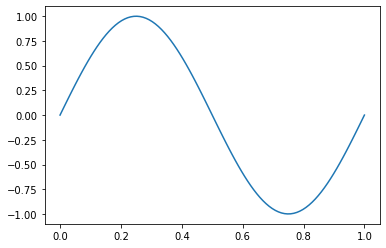

In [14]:
x_true_plot = np.linspace(0,1,100, endpoint=True)
y_true_plot = ground_truth_fn(x_true_plot)
plt.plot(x_true_plot, y_true_plot)
plt.show()

Esta es la manera mas sencilla y directa de utilizar Matplotlib, pero tenemos que ir un poco mas en profundidad. 

La visualización de datos es una cuestión crucial tanto como para el desarrollo de sistemas, como para la documentación y divulgación de resultados. Es por eso que pretendemos que con el pasar de las clases desarrollemos un criterio de buenas practicas de graficación, en donde deberemos considerar cuales son los elementos con los que debe contar un gráfico para poder ser interpretado correctamente. 

Lo primero es comprender que información necesitamos sumar a un gráfico y porqué. Luego, revisando los apuntes propuestos por la cátedra, revisando la documentación oficial, mediante busquedas en internet o consultando con los docentes (en ese orden preferentemente) van a poder modificar los graficos según su conveniencia. Por ahora, sumemos algunas cosas básicas para seguir con el ejemplo, utilizando esta misma API.  

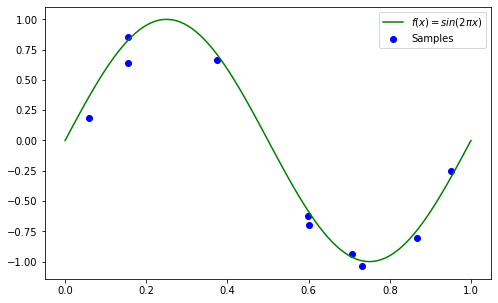

In [15]:
plt.figure(figsize=(8,5))
plt.plot(x_true_plot, y_true_plot, label='$f(x) = sin(2 \pi x)$', color='green')
plt.scatter(X, Y, marker='o', color='blue', label='Samples',)
plt.legend()
plt.show()

Entonces, comenzamos a buscar funciones que nos sirvan para predecir $Y$ a partir de $X$. 

El primer aproximamiento naturalmente puede ser un polinomio de orden $M$:

$$h(x, w) = w_{0} + w_{1}x + w_{2}x^{2}+ ... + w_{M-1}x^{M-1} = \sum_{j=0}^{M-1}w_{j}x^{j}$$


#### 🤔 Si es un modelo <span style="color: purple;">lineal</span>, ¿porqué vemos coeficientes elevados a potencias eventualmente mayores que 1?


* Cuando decimos que es un modelo lineal, nos referimos a que el modelo es <span style="color: purple;">lineal en relación a los parámetros ajustables del modelo</span>.

* Ahora necesitamos determinar los valores de los coeficientes $w_{j}$, quienes definen el comportamiento de la función $h$. 

* Anteriormente dijimos que queriamos encontrar una buena función $h$, y que por "buena" entendemos que es buena estimando los valores de $Y$ a partir de $X$. 

* Entonces, para medir "que tan buena" es esta función necesito definir una manera de medir que tan bien estima estos valores. Para ello utilizamos una <span style="color: purple;">función de error</span>, que podemos definir a nuestra conveniencia. 

* Una opción usual es utilizar la suma cuadrática de las diferencias entre las predicciones $\hat{Y}$ y los valores objetivos $Y$:


$$E(W) = \frac{1}{2} \sum_{j=1}^{N}[h(x_{j}, w)-y_{j}]^{2} = \frac{1}{2} \sum_{n=1}^{N}[\hat{y}_{j}-y_{j}]^{2} $$

In [16]:
def err_fn(y_true, y_pred):
    return 0.5*np.sum((y_true-y_pred)**2)

Entonces, resolver este problema es equivalente a <span style="color: purple;">minimizar</span> esta función, es decir, correr un proceso de optimización en donde encuentre el conjunto de parámetros $W$ que minimizen $E(W)$. 

Como la función de error es cuadrática respecto a los coeficientes $W$, sus derivadas seran lineales con respecto a $W$, entonces la minimización de la función de error tiene una <span style="color: purple;">única solución</span> $W^{*}$.

Como este modelo es simple, podemos utilizar las ecuaciones algebraicas clasicas de cuadrados minimos para resolver el problema de optimización. Mas adelante vamos a ver otra metodología mas general.

In [17]:
M = 2 # orden del polinomio (define cuantos W tengo)

In [18]:
from utils import get_best_coef

In [19]:
w = get_best_coef(X, Y, M)
poly = np.polynomial.polynomial.Polynomial(w)

Polinomio grado 2: 0.73315716 - 1.79549735·x
ϕ: 
[[1.         0.37454012]
 [1.         0.95071431]
 [1.         0.73199394]
 [1.         0.59865848]
 [1.         0.15601864]
 [1.         0.15599452]
 [1.         0.05808361]
 [1.         0.86617615]
 [1.         0.60111501]
 [1.         0.70807258]]
W:
 [ 0.73315716 -1.79549735]


In [20]:
y_pred_plot = poly(x_true_plot)

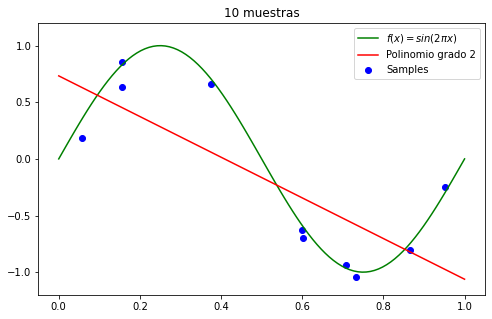

In [21]:
plt.figure(figsize=(8,5))
plt.title(f'{N} muestras')
plt.plot(x_true_plot, y_true_plot, label='$f(x) = sin(2 \pi x)$', color='green')
plt.plot(x_true_plot, y_pred_plot, label=f'Polinomio grado {M}', color='red')
plt.scatter(X, Y, marker='o', color='blue', label='Samples',)
plt.legend()
plt.ylim(-1.2,1.2)
plt.show()

<div class="alert alert-block alert-info">
💻 <b>Ejercicio [overfitting-underfitting] </b> 

Generar una secuencia de gráficos para distintos grados de polinomios, desde M=1 hasta M = 10, para el mismo ejemplo de 10 muestras.
</div>

In [22]:
from utils import model_predict

Polinomio grado 1: -0.20074697
ϕ: 
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
W:
 [-0.20074697]
Polinomio grado 2: 0.73315716 - 1.79549735·x
ϕ: 
[[1.         0.37454012]
 [1.         0.95071431]
 [1.         0.73199394]
 [1.         0.59865848]
 [1.         0.15601864]
 [1.         0.15599452]
 [1.         0.05808361]
 [1.         0.86617615]
 [1.         0.60111501]
 [1.         0.70807258]]
W:
 [ 0.73315716 -1.79549735]
Polinomio grado 3: 1.01489309 - 3.6733533·x + 1.92877073·x²
ϕ: 
[[1.         0.37454012 0.1402803 ]
 [1.         0.95071431 0.90385769]
 [1.         0.73199394 0.53581513]
 [1.         0.59865848 0.35839198]
 [1.         0.15601864 0.02434182]
 [1.         0.15599452 0.02433429]
 [1.         0.05808361 0.00337371]
 [1.         0.86617615 0.75026112]
 [1.         0.60111501 0.36133926]
 [1.         0.70807258 0.50136678]]
W:
 [ 1.01489309 -3.6733533   1.92877073]
Polinomio grado 4: -0.51209311 + 13.64127258·x - 38.29284478·x² + 25.52073931·x³
ϕ: 
[[1.

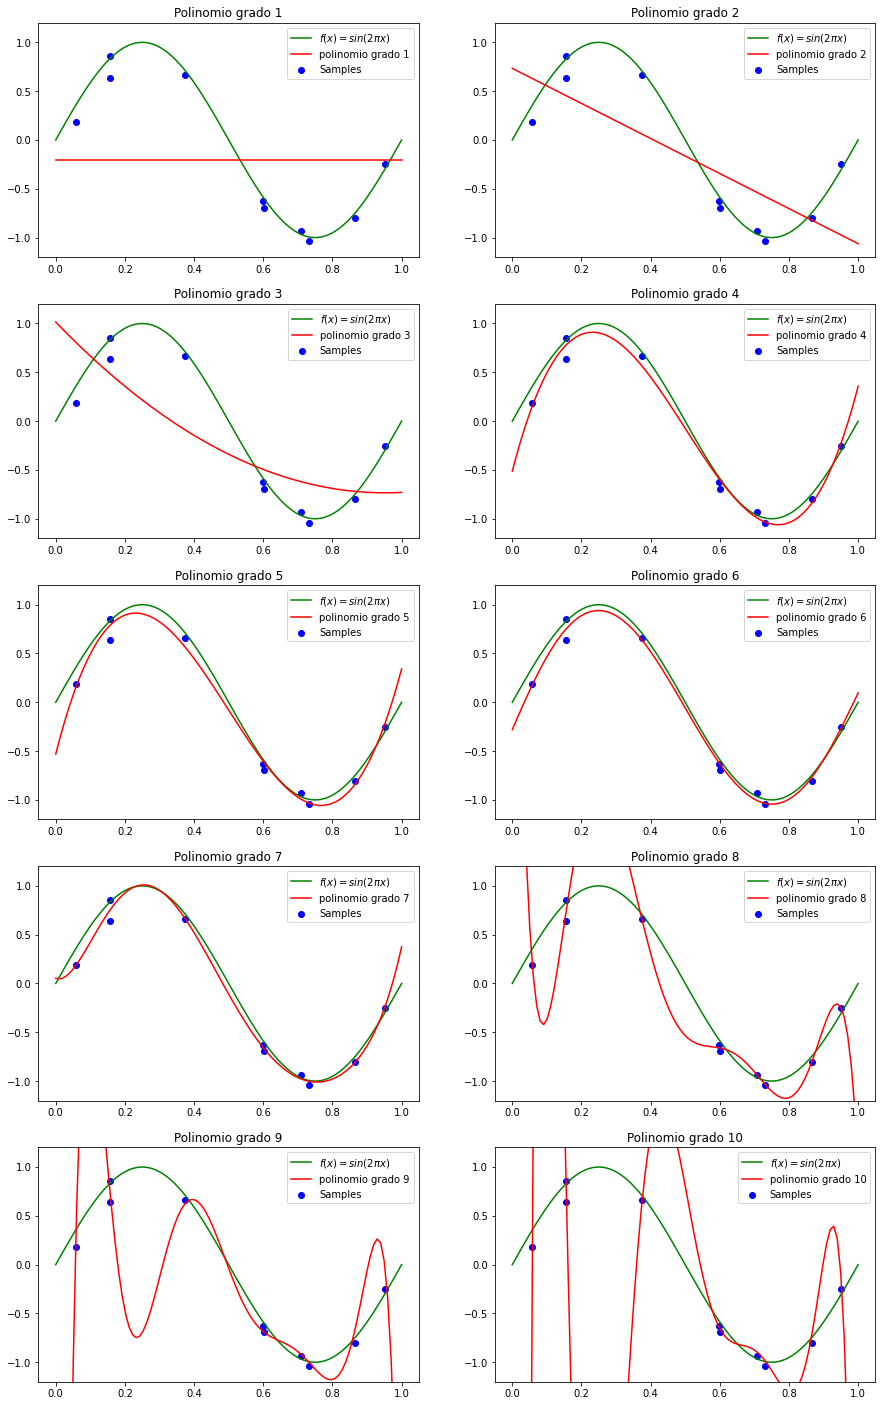

In [23]:
fig, axs = plt.subplots(5, 2, figsize=(15,25))
for ax, M in zip(axs.flatten(), range(1, 11)):
    w = get_best_coef(X, Y, M)
    y_pred_plot = model_predict(w, x_true_plot)
    ax.set_title(f'Polinomio grado {M}')
    ax.plot(x_true_plot, y_true_plot, label='$f(x) = sin(2 \pi x)$', color='green')
    ax.plot(x_true_plot, y_pred_plot, label=f'polinomio grado {M}', color='red')
    ax.scatter(X, Y, marker='o', color='blue', label='Samples',)
    ax.legend()
    ax.set_ylim(-1.2,1.2)

Entonces, como nuestro objetivo final es siempre la <span style="color: purple;">generalización</span> del modelo, podemos considerar un nuevo conjunto de datos que NO se utilizan para elegir el modelo (determinar el valor de los parámetros $W$) sino que se reservan únicamente para evaluar el rendimiento del modelo en datos no vistos previamente.

Para cada grado $M$ del polinomio, podemos calcular el error tanto en los datos de entrenamiento como en los datos de prueba o evaluación.

Suele ser conveniente utilizar la versión cuadrática media del error definida anteriormente (RMSE, Root Mean Squared Error), ya que, al estar normalizada, permite comparar distintos tamaños de conjuntos de datos. Además, la raíz cuadrada nos devuelve el error en las mismas unidades y escala que el valor que busca estimar el modelo. Para un caso de magnitudes reales, este error es más interpretable.

In [24]:
def rms_err(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    N = len(y_true)
    e_w = err_fn(y_true, y_pred)
    return np.sqrt((2*e_w)/(N))

Creamos data de testeo:

In [25]:
X, Y, Y_true = get_data(N=10, gt_fn=ground_truth_fn)
X_test, Y_test, Y_true_test = get_data(N=100, gt_fn=ground_truth_fn)

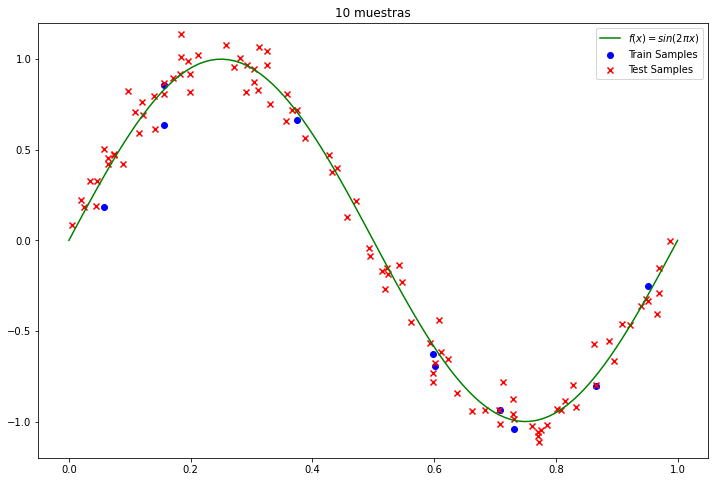

In [26]:
plt.figure(figsize=(12,8))
plt.title(f'{N} muestras')
plt.plot(x_true_plot, y_true_plot, label='$f(x) = sin(2 \pi x)$', color='green')
plt.scatter(X, Y, marker='o', color='blue', label='Train Samples',)
plt.scatter(X_test, Y_test, marker='x', color='red', label='Test Samples',)
plt.legend()
plt.ylim(-1.2,1.2)
plt.show()

<div class="alert alert-block alert-info">
💻 <b>Ejercicio [training vs test error] </b> 

Para estos conjuntos de entrenamiento y de testeo, fitear el modelo con distintos grados M desde 1 hasta 10, y graficar el error en entrenamiento y en testeo.
</div>

Polinomio grado 1: -0.20074697
ϕ: 
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
W:
 [-0.20074697]
Polinomio grado 2: 0.73315716 - 1.79549735·x
ϕ: 
[[1.         0.37454012]
 [1.         0.95071431]
 [1.         0.73199394]
 [1.         0.59865848]
 [1.         0.15601864]
 [1.         0.15599452]
 [1.         0.05808361]
 [1.         0.86617615]
 [1.         0.60111501]
 [1.         0.70807258]]
W:
 [ 0.73315716 -1.79549735]
Polinomio grado 3: 1.01489309 - 3.6733533·x + 1.92877073·x²
ϕ: 
[[1.         0.37454012 0.1402803 ]
 [1.         0.95071431 0.90385769]
 [1.         0.73199394 0.53581513]
 [1.         0.59865848 0.35839198]
 [1.         0.15601864 0.02434182]
 [1.         0.15599452 0.02433429]
 [1.         0.05808361 0.00337371]
 [1.         0.86617615 0.75026112]
 [1.         0.60111501 0.36133926]
 [1.         0.70807258 0.50136678]]
W:
 [ 1.01489309 -3.6733533   1.92877073]
Polinomio grado 4: -0.51209311 + 13.64127258·x - 38.29284478·x² + 25.52073931·x³
ϕ: 
[[1.

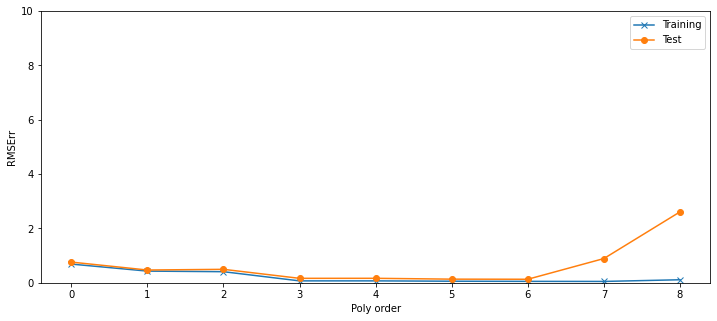

In [27]:
training_err = []
test_err = []
for M in range(1,10):
    w = get_best_coef(X, Y, M) # con estos pesos estimo train y test
    y_pred = model_predict(w, X)
    training_err.append(rms_err(Y, y_pred))
    y_pred_test = model_predict(w, X_test)
    test_err.append(rms_err(Y_test, y_pred_test))

plt.figure(figsize=(12,5))
plt.plot(training_err, label='Training', marker='x')
plt.plot(test_err, label='Test', marker='o')
plt.ylim(0,10)
plt.ylabel('RMSErr')
plt.xlabel('Poly order')
plt.legend(); plt.show()

De lo anterior podemos concluir que luego de un cierto punto, sumar mas términos en el polinomio no me permite lograr una mejor generalización, sino que genera  <span style="color: purple;">overfitting</span>. 

En este punto, como sabemos que los datos se generan siguiendo una función senoidal, podriamos esperar que el modelo que mejor generalize sobre estos datos sea el que mas se asimile a una función senoidal.

Entonces según la intuición, el siguiente paso es intentar ajustar los mismos datos utilizando una **función de base sinusoidal**. Esto significa que en lugar de emplear potencias de $x$ como base (es decir, $1, x, x^2, \dots$), utilizaremos la función seno para construir la matriz de diseño.

<div class="alert alert-block alert-info">
💻 <b>Ejercicio [regresión con función base sinusoidal]</b> 

Implementar una regresión no lineal usando la función seno como base y analicen cómo cambia el ajuste comparado con la regresión polinomial. Recuerden que la ecuación que deben utilizar para predecir los valores \(y\) será de la forma:

$$y = w_0 + w_1 \sin(2 \pi x)$$

Donde $w_0$ y $w_1$ son los coeficientes que deberán encontrar.

</div>

In [28]:
def sinusoidal_basis(x, degree):
    return np.sin(2 * np.pi * x * degree)

In [29]:
from utils import get_best_coef_reg

In [30]:
w_sin = get_best_coef_reg(X, Y, M, basis_fn=sinusoidal_basis)
y_pred_sin = model_predict(w_sin, X, basis_fn=sinusoidal_basis)

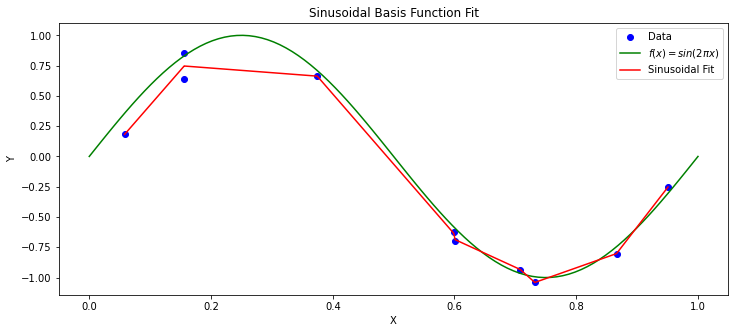

In [31]:
# Plotting
plt.figure(figsize=(12, 5))
plt.scatter(X, Y, label="Data", color='blue')
plt.plot(x_true_plot, y_true_plot, label='$f(x) = sin(2 \pi x)$', color='green')
plt.plot(np.sort(X), y_pred_sin[np.argsort(X)], label="Sinusoidal Fit", color='red')
plt.title("Sinusoidal Basis Function Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## 📝 Conclusiones
- Un modelo de regresión lineal con mucha complejidad sobre pocos datos genera overfitting.
- Aumentar la cantidad de datos para un mismo modelo mejora la condición de overfitting.
- La necesidad de setear la complejidad del modelo o el número de parámetros (no son siempre sinónimos directos) respecto a la cantidad de datos no parece algo deseable, y es un problema típico de este tipo de estimación por minimos cuadrados.
- La inferencia bayesiana soluciona este clase de problemas de overfitting por sobre-complejidad del modelo.

### ❓ Algunas preguntas
   - ¿Cómo escala este modelo con los datos?
   - ¿Cómo escala este modelo con la cantidad de parámetros?